# Data Hazard Selections

Participants selected the Hazards they thought applied before and after the workshop discussions. Here we are assessing how this changed between the two timepoints. 

In [ ]:
import pandas as pd

In [2]:
data = pd.read_excel("DataHazards_WorkshopData.xlsx")

In [3]:
data.head()

,event,participant-work,participant-field,participant-type,project,Pre_AutoDecision,Pre_ClassifiesRanks,Pre_LacksCommunity,Pre_DifficultUnderstand,Pre_DirectHarm,...,Post_High environmental cost,Post_InformedConsent,Post_Misuse,Post_Privacy,Post_ReinforcesBiases,eval-clear,eval-easy,eval-hazards-useful,eval-group-useful,eval-learned
0,sept-21,Higher Education,Engineering,Audience member,Project 1,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,Very clear,Very easy,Very useful,Very useful,Very much
1,sept-21,Higher Education,"Science,Health Sciences,Life Sciences",Project owner (presenting a project),Project 1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,Very clear,Somewhat easy,Somewhat useful,Somewhat useful,Somewhat
2,sept-21,"Higher Education,Private/Public Sector,Data Sc...","Mathematics,Health Sciences",Audience member,Project 1,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,Very clear,Very easy,Very useful,Somewhat useful,Very much
3,sept-21,Higher Education,Ethicist,Audience member,Project 1,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,Somewhat clear,Very easy,Very useful,Somewhat useful,Very much
4,sept-21,Higher Education,Engineering,Audience member,Project 1,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,Very clear,Somewhat easy,Very useful,Somewhat useful,Very much


In [4]:
pre = data.filter(regex='Pre_')
post = data.filter(regex='Post_')

In [5]:
# Create a column counting the before and after for both. Must have all valid values to be counted.
data['Pre_Count'] = pre.sum(axis=1, min_count=11)
data['Post_Count'] = post.sum(axis=1, min_count=11)

In [6]:
# Subset relevant columns and only rows with no missing data
counts = data[['participant-type', 'project', 'Pre_Count', 'Post_Count']]
# Subset for only audience members
counts = counts.loc[counts['participant-type'] == "Audience member"]
# Only keep rows with no missing data
counts = counts.dropna()

## Describing the difference in choices by project

In [7]:
counts.groupby('project')['Pre_Count', 'Post_Count'].mean()

/var/folders/tx/67h5cbx52_3djdg95lvy51fm0000gq/T/ipykernel_68983/1783414304.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  counts.groupby('project')['Pre_Count', 'Post_Count'].mean()


,Pre_Count,Post_Count
project,,
Project 1,6.500000,7.666667
Project 2,5.200000,6.000000
Project 3,5.200000,5.800000
Project 4,4.866667,5.266667
Project 5,7.400000,6.800000


In [8]:
# Counts of participants in each group
counts.groupby('project').count()

,participant-type,Pre_Count,Post_Count
project,,,
Project 1,6,6,6
Project 2,5,5,5
Project 3,5,5,5
Project 4,15,15,15
Project 5,5,5,5


In [9]:
# Number of observations included total
len(counts)

36

In [10]:
# Mean number of Hazards before
counts['Pre_Count'].mean()

5.583333333333333

In [11]:
# Mean number of Hazards after
counts['Post_Count'].mean()

6.055555555555555

## Formally testing the difference

Using a one tailed paired students t-test. 

In [12]:
from scipy import stats
import matplotlib.pyplot as plt

First just do a quick visual check of the distributions. The sample is small (36) so we're not expecting there to be a perfectly normal distribution.

(array([1., 6., 6., 5., 0., 5., 6., 5., 0., 2.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

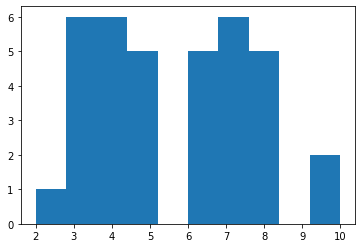

In [13]:
plt.hist(counts['Pre_Count'])

(array([1., 1., 1., 8., 4., 4., 8., 5., 1., 3.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

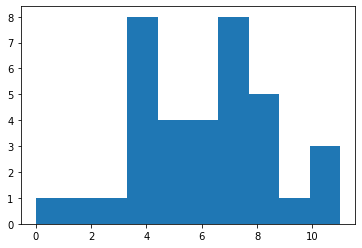

In [14]:
plt.hist(counts['Post_Count'])

In [15]:
# Run the ttest - specify alternative hypothesis that the mean of pre is less than the mean of post 
stats.ttest_rel(counts['Pre_Count'], counts['Post_Count'], alternative = 'less')

Ttest_relResult(statistic=-1.3921604610050047, pvalue=0.08632855072434303)